In [98]:
pip install xgboost

     -------------------------------------- 99.7/99.7 MB 156.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1506]:
pip install statsmodels

     ---------------------------------------- 9.4/9.4 MB 225.0 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 126.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler


Reading the data

In [266]:
train=pd.read_csv("G:\\Work\\m_essam1999-attachments\\traindata.csv")
test_data=pd.read_csv("G:\\Work\\m_essam1999-attachments\\testdata.csv")
test_labels=pd.read_csv("G:\\Work\\m_essam1999-attachments\\Test_labels.csv")

In [267]:
train.sample(10)


,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
21272,21272,0,udp,domain_u,SF,45,45,0,0,0,...,0.98,0.01,0.01,0.00,0.0,0.0,0.00,0.0,18,0
7523,7523,0,tcp,http,SF,210,343,0,0,0,...,1.00,0.00,0.12,0.01,0.0,0.0,0.00,0.0,21,0
13502,13502,0,tcp,private,S0,0,0,0,0,0,...,0.12,0.06,0.00,0.00,1.0,1.0,0.00,0.0,18,1
5342,5342,21767,tcp,private,RSTR,1,0,0,0,0,...,0.01,0.73,1.00,0.00,0.0,0.0,1.00,1.0,15,1
17156,17156,0,tcp,ftp,RSTO,0,0,0,0,0,...,0.02,0.08,0.00,0.00,0.0,0.0,1.00,1.0,20,1
2010,2010,6,tcp,smtp,SF,1234,342,0,0,0,...,0.84,0.06,0.02,0.01,0.0,0.0,0.00,0.0,21,0
14622,14622,0,tcp,http,SF,250,293,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.0,21,0
15280,15280,0,udp,private,SF,1,0,0,0,0,...,0.32,0.10,0.95,0.00,0.0,0.0,0.05,0.0,13,1
5261,5261,6707,udp,other,SF,146,105,0,0,0,...,0.02,0.63,0.95,0.00,0.0,0.0,0.00,0.0,21,0
17990,17990,0,tcp,private,S0,0,0,0,0,0,...,0.04,0.07,0.00,0.00,1.0,1.0,0.00,0.0,21,1


In [268]:
test_data

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,4,tcp,pop_3,SF,30,93,0,0,0,...,0.91,0.04,0.00,0.00,0.0,0.0,0.0,0.0,16,1
1,1,0,tcp,private,S0,0,0,0,0,0,...,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,21,1
2,2,0,udp,private,SF,52,54,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,17,0
3,3,0,tcp,http,SF,367,588,0,0,0,...,1.00,0.00,0.12,0.06,0.0,0.0,0.0,0.0,21,0
4,4,0,icmp,ecr_i,SF,1008,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,22496,0,tcp,http,SF,298,2248,0,0,0,...,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0,21,0
22497,22497,281,tcp,ftp,SF,160,599,0,0,0,...,0.34,0.04,0.01,0.00,0.0,0.0,0.0,0.0,11,1
22498,22498,0,tcp,private,S0,0,0,0,0,0,...,0.07,0.06,0.00,0.00,1.0,1.0,0.0,0.0,21,1
22499,22499,0,tcp,http,SF,199,11107,0,0,0,...,1.00,0.00,0.06,0.04,0.0,0.0,0.0,0.0,21,0


data cleaning

In [269]:
train.isnull().sum()

ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [270]:
test_data.isnull().sum()

ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [271]:
train.drop("ID",axis='columns',inplace=True)
test_data.drop(["ID",'Class'],axis='columns',inplace=True)
test_labels.drop("ID",axis='columns',inplace=True)

In [272]:
train = train.drop(train[train['service'] == 'red_i'].index)
train = train.drop(train[train['service'] == 'urh_i'].index)

In [164]:
test_labels.iloc[19742]

Class    0
Name: 19742, dtype: int64

In [165]:
test_data.shape,test_labels.shape

((22501, 43), (22501, 1))

In [74]:
train.drop?

In [1080]:
test_data[test_data['service'] == 'tftp_u']

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
19742,19742,0,udp,tftp_u,SF,1,0,0,0,0,...,7,0.03,0.55,0.69,0.0,0.0,0.0,0.31,0.0,6


EDA

In [273]:
import matplotlib.pyplot as plt 
import seaborn as sns

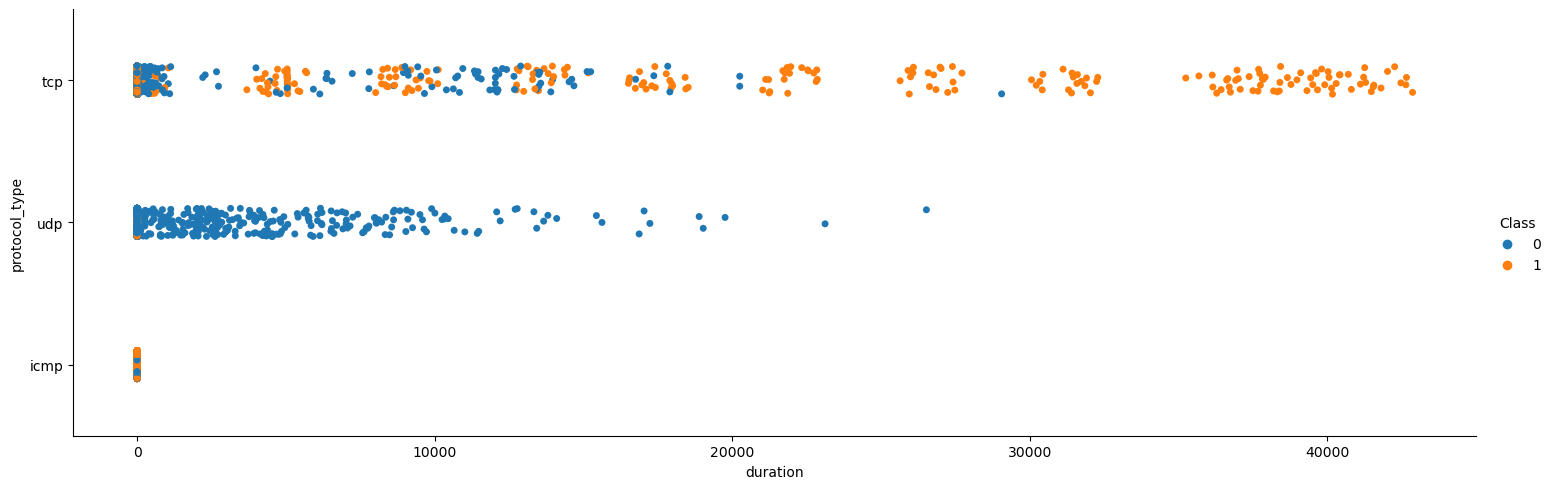

In [274]:
sns.catplot(x='duration',y='protocol_type',hue='Class',data=train,aspect=3)
plt.show()

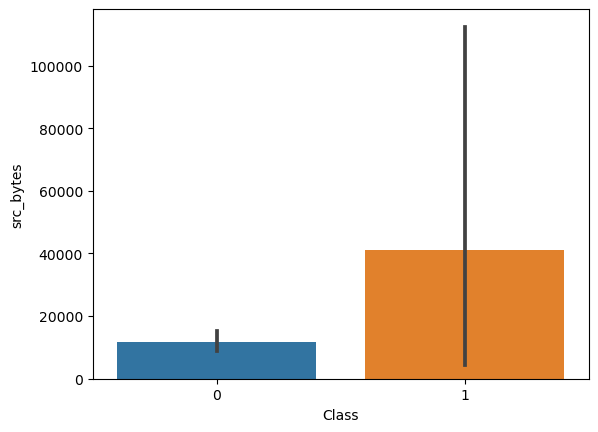

In [275]:
sns.barplot(x='Class',y='src_bytes',data=train)
plt.show()

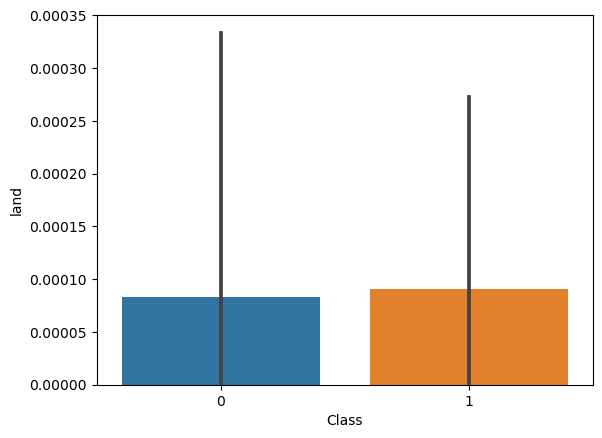

In [276]:
sns.barplot(x='Class',y='land',data=train)
plt.show()

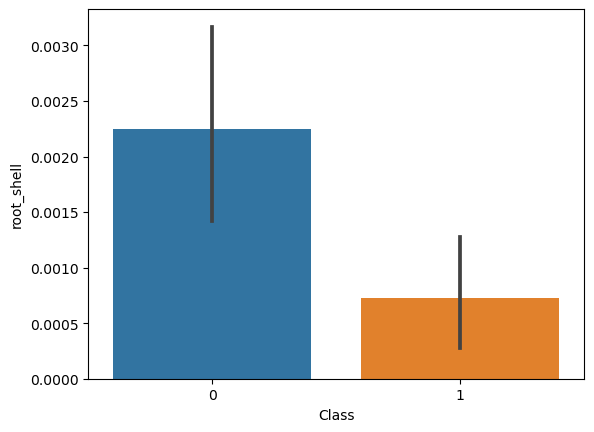

In [277]:
sns.barplot(x='Class',y='root_shell',data=train)
plt.show()

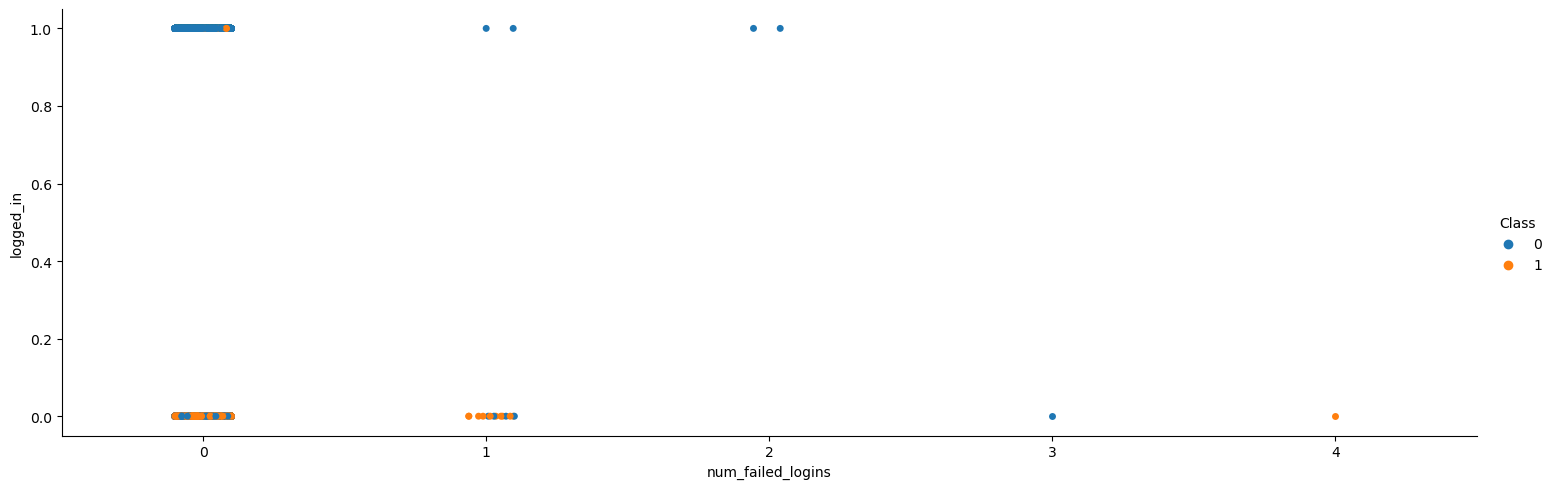

In [278]:
sns.catplot(x='num_failed_logins',y='logged_in',hue='Class',data=train,aspect=3)
plt.show()

In [279]:
for i in train:
    print("non_Zeros in",i,':',(np.count_nonzero(train[i])))

non_Zeros in duration : 1830
non_Zeros in protocol_type : 22995
non_Zeros in service : 22995
non_Zeros in flag : 22995
non_Zeros in src_bytes : 13791
non_Zeros in dst_bytes : 10390
non_Zeros in land : 2
non_Zeros in wrong_fragment : 210
non_Zeros in urgent : 1
non_Zeros in hot : 477
non_Zeros in num_failed_logins : 20
non_Zeros in logged_in : 8891
non_Zeros in num_compromised : 244
non_Zeros in root_shell : 35
non_Zeros in su_attempted : 18
non_Zeros in num_root : 118
non_Zeros in num_file_creations : 60
non_Zeros in num_shells : 8
non_Zeros in num_access_files : 68
non_Zeros in num_outbound_cmds : 0
non_Zeros in is_host_login : 0
non_Zeros in is_guest_login : 210
non_Zeros in count : 22995
non_Zeros in srv_count : 22995
non_Zeros in serror_rate : 7372
non_Zeros in srv_serror_rate : 6999
non_Zeros in rerror_rate : 2963
non_Zeros in srv_rerror_rate : 2983
non_Zeros in same_srv_rate : 22480
non_Zeros in diff_srv_rate : 9293
non_Zeros in srv_diff_host_rate : 5093
non_Zeros in dst_host_cou

Feature Engineering

In [280]:
columns=['land','wrong_fragment','hot','urgent','num_failed_logins','num_compromised','root_shell','su_attempted','num_root',
      'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login']

In [281]:
train.drop(columns,axis='columns',inplace=True)
test_data.drop(columns,axis='columns',inplace=True)

In [282]:
data= ['duration','src_bytes','dst_bytes','count','srv_count','dst_host_count','dst_host_srv_count']
fs=train.copy()

for x in data:
    fs.loc[(fs[x] <= fs[x].quantile(0.25)), x]=0
    fs.loc[(fs[x] > fs[x].quantile(0.25)) & (fs[x]<= fs[x].quantile(0.50)), x]=1
    fs.loc[(fs[x] > fs[x].quantile(0.50)) & (fs[x]<= fs[x].quantile(0.75)), x]=2
    fs.loc[(fs[x] > fs[x].quantile(0.75)) & (fs[x]<= fs[x].quantile(0.95)), x]=3
    fs.loc[(fs[x] > fs[x].quantile(0.95)), x]=4
    
train=fs.copy()

In [283]:
train.drop('service',axis='columns',inplace=True)
test_data.drop('service',axis='columns',inplace=True)

In [285]:
train=pd.get_dummies(train,columns=['protocol_type','flag'])
test_data=pd.get_dummies(test_data,columns=['protocol_type','flag'])

KeyError: "None of [Index(['protocol_type', 'flag'], dtype='object')] are in the [columns]"

In [286]:
corrm=train.corr()
corrm

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.225722,0.151220,0.106231,-0.309788,-0.314264,-0.182040,-0.182295,0.059994,0.057495,...,-0.086265,-0.003258,0.082473,0.299857,-0.184091,-0.017313,0.011537,0.022696,0.130480,-0.012456
src_bytes,0.225722,1.000000,0.673752,0.764014,-0.493291,-0.055028,-0.657702,-0.655039,-0.348950,-0.343011,...,-0.327406,-0.097966,-0.026464,-0.063599,-0.663021,0.043505,0.028431,0.027827,0.834555,-0.044863
dst_bytes,0.151220,0.673752,1.000000,0.786727,-0.410257,0.006244,-0.536188,-0.532845,-0.300452,-0.295125,...,-0.268741,-0.070715,-0.025399,-0.092386,-0.544220,0.069827,0.024063,0.009687,0.691006,-0.036824
logged_in,0.106231,0.764014,0.786727,1.000000,-0.492551,-0.148930,-0.492824,-0.490632,-0.281174,-0.276525,...,-0.247861,-0.064939,-0.023426,-0.092686,-0.501937,0.055289,0.033111,0.026198,0.639012,-0.033963
count,-0.309788,-0.493291,-0.410257,-0.492551,1.000000,0.508833,0.521475,0.516497,0.071424,0.072572,...,0.134109,0.056740,0.020157,-0.149359,0.529259,-0.065789,-0.031306,-0.023013,-0.518316,-0.052029
srv_count,-0.314264,-0.055028,0.006244,-0.148930,0.508833,1.000000,0.082490,0.084063,-0.204388,-0.206816,...,-0.144155,-0.018766,-0.027774,-0.165512,0.096811,-0.050165,-0.019298,-0.016274,0.059873,-0.048238
serror_rate,-0.182040,-0.657702,-0.536188,-0.492824,0.521475,0.082490,1.000000,0.993420,-0.233291,-0.233228,...,-0.192932,-0.072649,0.021927,-0.093381,0.979222,0.067439,0.030601,0.016632,-0.761172,0.066994
srv_serror_rate,-0.182295,-0.655039,-0.532845,-0.490632,0.516497,0.084063,0.993420,1.000000,-0.235173,-0.240558,...,-0.200769,-0.071960,0.013705,-0.092473,0.982469,0.057857,0.018527,0.014725,-0.757567,0.066635
rerror_rate,0.059994,-0.348950,-0.300452,-0.281174,0.071424,-0.204388,-0.233291,-0.235173,1.000000,0.989246,...,0.832273,0.298040,0.023114,0.375847,-0.231831,-0.021140,-0.010779,-0.008915,-0.437914,-0.016034
srv_rerror_rate,0.057495,-0.343011,-0.295125,-0.276525,0.072572,-0.206816,-0.233228,-0.240558,0.989246,1.000000,...,0.838676,0.293057,0.034356,0.376700,-0.236820,-0.022329,-0.009865,-0.008932,-0.436757,-0.015939


In [287]:
corr_Y_X= corrm[(corrm.Class<0.1) & (corrm.Class >-0.1)].T.columns
corr_Y_X


Index(['srv_count', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'protocol_type_tcp', 'flag_OTH',
       'flag_RSTO', 'flag_RSTOS0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SH'],
      dtype='object')

In [288]:
train.drop(corr_Y_X,axis='columns',inplace=True)
test_data.drop(corr_Y_X,axis='columns',inplace=True)

In [289]:
corr_x=train.corr()
corr_x_x=corr_x.unstack().sort_values().drop_duplicates().reset_index()
corr_x_x=corr_x_x.loc[(corr_x_x[0]>0.90) | (corr_x_x[0]<-0.90)]['level_0'].drop_duplicates()
corr_x_x

362        dst_host_rerror_rate
363    dst_host_srv_rerror_rate
364                 rerror_rate
366             srv_rerror_rate
367                     flag_S0
368        dst_host_serror_rate
369                 serror_rate
373             srv_serror_rate
375    dst_host_srv_serror_rate
378                    duration
Name: level_0, dtype: object

In [290]:
columns_X_X=['dst_host_rerror_rate','dst_host_srv_rerror_rate','rerror_rate','srv_rerror_rate','dst_host_serror_rate','srv_serror_rate','serror_rate','dst_host_srv_serror_rate','duration']

In [292]:
train.drop(columns_X_X,axis='columns',inplace=True)
test_data.drop(columns_X_X,axis='columns',inplace=True)

In [293]:
train_data=train.drop("Class",axis='columns')
train_labels=train.Class

In [294]:
train

,src_bytes,dst_bytes,logged_in,count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,level,Class,protocol_type_icmp,protocol_type_udp,flag_REJ,flag_RSTR,flag_S0,flag_SF
0,3,3,1,0,1.00,0.00,0.67,1,2,1.00,0.00,21,0,0,0,0,0,0,1
1,3,3,1,1,1.00,0.00,0.29,1,2,1.00,0.00,21,0,0,0,0,0,0,1
2,3,3,1,0,1.00,0.00,0.00,1,2,0.45,0.02,11,1,0,0,0,0,0,1
3,3,2,1,1,1.00,0.00,0.50,1,2,1.00,0.00,21,0,0,0,0,0,0,1
4,0,0,0,0,0.50,1.00,0.00,1,0,0.01,0.03,11,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,0,0,0,0,1.00,0.00,0.00,0,2,1.00,0.00,21,0,0,0,1,0,0,0
22998,0,0,0,3,0.06,0.05,0.00,1,1,0.05,0.05,19,1,0,0,0,0,1,0
22999,0,0,0,2,0.02,0.06,0.00,1,1,0.06,0.08,21,1,0,0,0,0,1,0
23000,3,2,0,3,1.00,0.00,0.00,1,2,1.00,0.00,17,0,0,1,0,0,0,1


data Scaling

In [116]:
scale=StandardScaler()
train_data_scaled=scale.fit_transform(train_data)
test_data_scaled=scale.fit_transform(test_data)

In [88]:
from sklearn.tree  import DecisionTreeClassifier

In [117]:
clfd = DecisionTreeClassifier(criterion ="log_loss", max_depth = 3,max_features=19,splitter='best')


In [123]:
clfd.fit(train_data, train_labels.values.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features=19)

In [124]:
y_pred_probs=clfd.predict_proba(test_data) 
y_pred_probs

array([[5.28571429e-01, 4.71428571e-01],
       [1.62968535e-03, 9.98370315e-01],
       [8.84955752e-01, 1.15044248e-01],
       ...,
       [1.62968535e-03, 9.98370315e-01],
       [9.99898580e-01, 1.01419878e-04],
       [8.84955752e-01, 1.15044248e-01]])

In [125]:
y_pred = np.where(y_pred_probs[:,1] > 0.2, 1, 0).ravel()

f1 = f1_score(test_labels, y_pred)  # Calculate the F1 score

print("F1 Score:", f1)

F1 Score: 0.9304703476482618


In [ ]:
KNN=

In [1136]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(train_data, train_labels)
    accuracy = classifier_obj.score(test_data, test_labels)
    return accuracy

In [1137]:
import optuna

In [1138]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)


[I 2023-10-13 20:17:00,085] A new study created in memory with name: no-name-37a585d2-f31d-4cda-b6ca-b7856ee06f0b
[I 2023-10-13 20:17:00,111] Trial 0 finished with value: 0.7545886849473357 and parameters: {'dt_max_depth': 30, 'dt_max_features': 2}. Best is trial 0 with value: 0.7545886849473357.
[I 2023-10-13 20:17:00,138] Trial 1 finished with value: 0.7660992844762455 and parameters: {'dt_max_depth': 24, 'dt_max_features': 4}. Best is trial 1 with value: 0.7660992844762455.
[I 2023-10-13 20:17:00,161] Trial 2 finished with value: 0.8555175325541087 and parameters: {'dt_max_depth': 12, 'dt_max_features': 3}. Best is trial 2 with value: 0.8555175325541087.
[I 2023-10-13 20:17:00,187] Trial 3 finished with value: 0.8104084262921648 and parameters: {'dt_max_depth': 28, 'dt_max_features': 6}. Best is trial 2 with value: 0.8555175325541087.
[I 2023-10-13 20:17:00,215] Trial 4 finished with value: 0.7465445980178659 and parameters: {'dt_max_depth': 30, 'dt_max_features': 10}. Best is trial

FrozenTrial(number=14, state=TrialState.COMPLETE, values=[0.8670725745522421], datetime_start=datetime.datetime(2023, 10, 13, 20, 17, 0, 481258), datetime_complete=datetime.datetime(2023, 10, 13, 20, 17, 0, 514185), params={'dt_max_depth': 15, 'dt_max_features': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=14, value=None)


In [1413]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(train_data, train_labels)

dt_train, dt_test = dt.score(train_data, train_labels), dt.score(test_data, test_labels)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")



Train Score: 0.9989131379880011
Test Score: 0.830763077196569


In [1425]:
y_pred_probs=clfd.predict_proba(test_data) 
y_pred_probs

array([[5.28571429e-01, 4.71428571e-01],
       [1.68918919e-03, 9.98310811e-01],
       [8.84955752e-01, 1.15044248e-01],
       ...,
       [1.68918919e-03, 9.98310811e-01],
       [9.99898580e-01, 1.01419878e-04],
       [8.84955752e-01, 1.15044248e-01]])

In [1426]:
y_pred = np.where(y_pred_probs[:,1] > 0.2, 1, 0).ravel()

f1 = f1_score(test_labels, y_pred)  # Calculate the F1 score

print("F1 Score:", f1)

F1 Score: 0.9304703476482618


In [1503]:
feature_cols = train_data.columns.difference(['Activity','logged_in','flag_SF', 'dst_host_srv_rerror_rate',
                                               'same_srv_rate', 'dst_bytes','same_srv_rate'])

In [1504]:
my_formula = "Class ~" + "+".join(feature_cols)

In [1507]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

lm = sm.logit(formula = my_formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.103245
         Iterations 9


In [1508]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                23002
Model:                          Logit   Df Residuals:                    22987
Method:                           MLE   Df Model:                           14
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.8508
Time:                        21:37:37   Log-Likelihood:                -2374.8
converged:                       True   LL-Null:                       -15922.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14.2985      0.381     37.527      0.000      13.552      15.045
count                      1.4259      0.048     29.884      0.000       1.332       1.519
diff_srv_rate             -1.5071      0.222     -6.777      0.000      -1.943      -1.071
dst_host_count             0.0405      0.145      0.279      0.780      -0.244       0.325
dst_host_diff_srv_rate     3.4325      0.278     12.361      0.000       2.888       3.977
dst_host_same_srv_rate    -1.7627      0.186     -9.476      0.000      -2.127      -1.398
dst_host_srv_count        -0.6840      0.084     -8.164      0.000      -0.848      -0.520
flag_REJ                   2.5356      0.174     14.595      0.000       2.195       2.876
flag_RSTR                  2.5509      0.406      6.283      0.000       1.755       3.347
flag_S0                    4.2828      0.180     23.841      0.000       3.931       4.635
level                     -0.8274      0.020    -41.538      0.000      -0.866      -0.788
protocol_type_icmp         3.4762      0.133     26.086      0.000       3.215       3.737
protocol_type_udp         -1.3310      0.134     -9.940      0.000      -1.593      -1.069
src_bytes                 -0.6418      0.046    -13.889      0.000      -0.732      -0.551
srv_diff_host_rate         2.0499      0.161     12.738      0.000       1.734       2.365
==========================================================================================
"""

In [1509]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X=dmatrices(my_formula, train, return_type= 'dataframe')

# For each X, calculate the VIF and create dataframe

dict= {'VIF': [variance_inflation_factor(X.values,i) for i in range(X.shape[1])],
      'features': (X.columns)}

vif=pd.DataFrame(dict)

vif.sort_values('VIF', ascending=False)

,VIF,features
0,113.835961,Intercept
9,6.200092,flag_S0
5,5.131598,dst_host_same_srv_rate
13,4.075802,src_bytes
6,3.623992,dst_host_srv_count
7,2.729993,flag_REJ
1,2.084927,count
4,2.047284,dst_host_diff_srv_rate
3,1.678376,dst_host_count
12,1.591364,protocol_type_udp


In [1512]:
train['train_pred']=lm.predict(train_data)
test_data['test_pred']=lm.predict(test_data)

C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [1515]:
from sklearn import metrics
print("ROC AUC Score of training data: ", (metrics.roc_auc_score(train['Class'], train['train_pred'])))
print("ROC AUC Score of testing data: ", (metrics.roc_auc_score(test_labels['Class'], test_data['test_pred'])))

ROC AUC Score of training data:  0.9921206040453512
ROC AUC Score of testing data:  0.7836911163858504


In [1140]:
from sklearn.neighbors import KNeighborsClassifier


In [1141]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(train_data, train_labels)
    accuracy = classifier_obj.score(test_data, test_labels)
    return accuracy

In [1142]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

[I 2023-10-13 20:17:05,888] A new study created in memory with name: no-name-b304f729-e917-4795-907c-a779a4dff1bb
[I 2023-10-13 20:17:07,184] Trial 0 finished with value: 0.48180080885293985 and parameters: {'KNN_n_neighbors': 5}. Best is trial 0 with value: 0.48180080885293985.


FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.48180080885293985], datetime_start=datetime.datetime(2023, 10, 13, 20, 17, 5, 889559), datetime_complete=datetime.datetime(2023, 10, 13, 20, 17, 7, 184237), params={'KNN_n_neighbors': 5}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [1143]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(train_data, train_labels)

KNN_train, KNN_test = KNN_model.score(train_data, train_labels), KNN_model.score(test_data, test_labels)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9965209828223527
Test Score: 0.48180080885293985


In [1144]:
from sklearn.linear_model import LogisticRegression


In [1145]:
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

In [1517]:
lr.fit(train_data,train_labels)

C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1518]:
y_pred_probs=clfd.predict_proba(test_data) 
y_pred_probs

C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- test_pred

  warnings.warn(message, FutureWarning)


ValueError: X has 19 features, but DecisionTreeClassifier is expecting 18 features as input.

In [1146]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [1147]:

scores = {}
for name in models:
    scores[name]={}
    for scorer in ['precision','recall']:
        scores[name][scorer] = cross_val_score(models[name], train_data, train_labels, cv=10, scoring=scorer)

C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [1148]:
def line(name):
    return '*'*(25-len(name)//2)

for name in models:
    print(line(name), name, 'Model Validation', line(name))

    for scorer in ['precision','recall']:
        mean = round(np.mean(scores[name][scorer])*100,2)
        stdev = round(np.std(scores[name][scorer])*100,2)
        print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
        print()

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 99.24 % +- 0.28

Mean recall: 
 99.67 % +- 0.11

**************** LogisticRegression Model Validation ****************
Mean precision: 
 97.03 % +- 0.47

Mean recall: 
 97.38 % +- 0.44

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.46 % +- 0.23

Mean recall: 
 99.49 % +- 0.15



In [1149]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [1150]:
preds={}
for name in models:
    models[name].fit(train_data, train_labels)
    preds[name] = models[name].predict(test_data)
print("Predictions complete.")

Predictions complete.


C:\Users\Lenovo Ideapad L340\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(test_labels, preds[name]))
    print(line(name,'-'))
    print(classification_report(test_labels, preds[name], target_names=target_names))


NameError: name 'models' is not defined

In [1046]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [1047]:
mnb=MultinomialNB()
mnb.fit(train_data,train_labels)

MultinomialNB()

In [1048]:
gnb=GaussianNB()

gnb.fit(train_data,train_labels)

GaussianNB()

In [1049]:
from sklearn.svm import SVC 
svm=SVC(kernel='linear')
svm.fit(train_data,train_labels)

SVC(kernel='linear')

In [1050]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming 'X_test' is the feature matrix of the test data and 'y_test' is the corresponding target variable
y_pred = mnb.predict(test_data)  # Make predictions on the test data using the trained classifier

accuracy = accuracy_score(test_labels, y_pred)  # Calculate the accuracy
f1 = f1_score(test_labels, y_pred)  # Calculate the F1 score

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5015111111111111
F1 Score: 0.4518619880754569


In [625]:
from sklearn.ensemble import RandomForestClassifier

In [1107]:
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(train_data,train_labels)
y_pred = rfc.predict(test_data)  # Make predictions on the test data using the trained classifier

accuracy = accuracy_score(test_labels, y_pred)  # Calculate the accuracy
f1 = f1_score(test_labels, y_pred)  # Calculate the F1 score

print("Accuracy:", accuracy)
print("F1 Score:", f1)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [1052]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [1053]:
model= Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [629]:
cnn.

SyntaxError: invalid syntax (1214828975.py, line 1)

In [1054]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics='accuracy')

In [1055]:
model.fit(train_data,train_labels,epochs=10)

Epoch 1/10
719/719 [==============================] - 4s 3ms/step - loss: 0.1499 - accuracy: 0.9432
Epoch 2/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0786 - accuracy: 0.9727
Epoch 3/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0613 - accuracy: 0.9809
Epoch 4/10
719/719 [==============================] - 3s 4ms/step - loss: 0.0524 - accuracy: 0.9837
Epoch 5/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0438 - accuracy: 0.9871
Epoch 6/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 7/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 8/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0348 - accuracy: 0.9880
Epoch 9/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0308 - accuracy: 0.9890
Epoch 10/10
719/719 [==============================] - 2s 3ms/step - loss: 0.0300 - accuracy: 0.9894

In [1056]:
model.evaluate (test_data,test_labels)

704/704 [==============================] - 1s 2ms/step - loss: 11206.6094 - accuracy: 0.4878


[11206.609375, 0.4877777695655823]

In [1057]:
train_data.shape

(22994, 18)

In [1058]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten

In [1059]:
cnn=Sequential()
cnn.add(Conv1D(256,3,activation='relu',input_shape=(train_data.shape[1],1)))
cnn.add(Conv1D(256,3,activation='relu'))
cnn.add(MaxPooling1D(2))
cnn.add(Dropout(0.2))
cnn.add(Conv1D(128,3,activation='relu'))
cnn.add(Conv1D(128,3,activation='relu'))
cnn.add(MaxPooling1D(2))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(1,activation='sigmoid'))

In [1060]:
cnn.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 16, 256)           1024      
                                                                 
 conv1d_19 (Conv1D)          (None, 14, 256)           196864    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 7, 256)           0         
 1D)                                                             
                                                                 
 dropout_28 (Dropout)        (None, 7, 256)            0         
                                                                 
 conv1d_20 (Conv1D)          (None, 5, 128)            98432     
                                                                 
 conv1d_21 (Conv1D)          (None, 3, 128)            49280     
                                                     

In [1061]:
cnn.compile(optimizer='adam',loss='BinaryCrossentropy',metrics='accuracy')

In [1063]:
cnn.fit(train_data,train_labels,epochs=5)

Epoch 1/5
719/719 [==============================] - 8s 11ms/step - loss: 0.0272 - accuracy: 0.9896
Epoch 2/5
719/719 [==============================] - 8s 11ms/step - loss: 0.0250 - accuracy: 0.9909
Epoch 3/5
719/719 [==============================] - 9s 13ms/step - loss: 0.0230 - accuracy: 0.9916
Epoch 4/5
719/719 [==============================] - 8s 11ms/step - loss: 0.0202 - accuracy: 0.9923
Epoch 5/5
719/719 [==============================] - 10s 13ms/step - loss: 0.0203 - accuracy: 0.9927


In [1064]:
y_pred = cnn.predict(test_data)  # Make predictions on the test data using the trained classifier

f1 = f1_score(test_labels, y_pred)  # Calculate the F1 score

print("F1 Score:", f1)

704/704 [==============================] - 3s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [1065]:
cnn.evaluate(test_data,test_labels)

704/704 [==============================] - 4s 5ms/step - loss: 515.7827 - accuracy: 0.5636


[515.78271484375, 0.5636000037193298]

In [126]:
import xgboost as xgb
from xgboost import XGBClassifier

In [295]:
params = {'learning_rate': 0.1,
 'reg_lambda': 3.055515281981592e-03,
 'reg_alpha': 40.4080988656873,
 'subsample': 0.7982003191865019,
 'colsample_bytree': 0.672858658514022,
 'max_depth': 3}



model = XGBClassifier(**params)
model.fit(train_data, train_labels)


report = classification_report(test_labels, model.predict(test_data))

print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      9689
           1       0.96      0.90      0.93     12812

    accuracy                           0.92     22501
   macro avg       0.92      0.93      0.92     22501
weighted avg       0.92      0.92      0.92     22501



In [297]:
y_pred_probs=model.predict_proba(test_data) 
y_pred_probs

array([[0.56860054, 0.4313995 ],
       [0.00499576, 0.99500424],
       [0.8760089 , 0.12399106],
       ...,
       [0.00561726, 0.99438274],
       [0.9902748 , 0.00972522],
       [0.8760089 , 0.12399106]], dtype=float32)

In [301]:
#y_pred = model.predict(test_data)  # Make predictions on the test data using the trained classifier
y_pred = np.where(y_pred_probs[:,1] > thereshold, 1, 0).ravel()

f1 = f1_score(test_labels, y_pred)  # Calculate the F1 score

print("F1 Score:", f1)

F1 Score: 0.9499631225495905


In [300]:
thereshold=0.16

In [308]:
best_threshold = 0
best_f1_score = 0


step_size = 0.0001

for i in range(int(0.0 / step_size), 2000):  # Iterate from 0 to 500000
    threshold = i * step_size  # Convert to float with 5 decimal places
    predicted_labels = (y_pred_probs[:,1] >= threshold).astype(int)
    f1 = f1_score(test_labels, predicted_labels)

    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
        final_index=i

print(f"Best Threshold: {best_threshold:.6f}")
print(f"Best F1 Score: {best_f1_score}")
print(final_index)


Best Threshold: 0.138000
Best F1 Score: 0.9503452556443479
1380


In [228]:
y_pred

Best Threshold: 0.000000
Best F1 Score: 0.949999


In [ ]:
params = {'learning_rate': 0.1,
 'reg_lambda': 3.055515281981592e-03,
 'reg_alpha': 40.4080988656873,
 'subsample': 0.7982003191865019,
 'colsample_bytree': 0.672858658514022,
 'max_depth': 3}